In [1]:
import pandas as pd

# Extracting marriage postal survey participant data

In [2]:
df = pd.read_csv('Resources/participant-information.csv')

In [3]:
df.head()

,electoral_division,state,gender,age,age_lower,age_upper,eligible,participant
0,Canberra,Australian Capital Territory Divisions,female,18-19,18,19,"2,433","2,092"
1,Canberra,Australian Capital Territory Divisions,female,20-24,20,24,"6,171","5,084"
2,Canberra,Australian Capital Territory Divisions,female,25-29,25,29,"6,464","5,343"
3,Canberra,Australian Capital Territory Divisions,female,30-34,30,34,"6,359","5,260"
4,Canberra,Australian Capital Territory Divisions,female,35-39,35,39,"6,134","4,990"


# Extracting electorate division data

In [4]:
id_df = pd.read_csv('01-output_electoral_division/electoral_division.csv')
id_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


# Transforming the dataframe to look at age demographics of postal survey

In [5]:
# looking at the column names for marriage postal survey participant database
df.columns

Index(['electoral_division', 'state', 'gender', 'age', 'age_lower',
       'age_upper', 'eligible', 'participant'],
      dtype='object')

In [6]:
# looking at the data types for marriage postal survey participant database
df.dtypes

electoral_division    object
state                 object
gender                object
age                   object
age_lower              int64
age_upper              int64
eligible              object
participant           object
dtype: object

In [7]:
# converting participant column to string then integer
df["participant"] = df["participant"].astype('str')
df["participant"] = df["participant"].str.replace(",","").astype(int)

In [8]:
# checking the data types have changed successfully
df.dtypes

electoral_division    object
state                 object
gender                object
age                   object
age_lower              int64
age_upper              int64
eligible              object
participant            int64
dtype: object

In [9]:
len(df)

4500

In [10]:
# dropping any na values 
df = df.dropna()
len(df)

4500

In [11]:
# looking at the age groups from the marriage postal survey
print(df["age"].max())
print(df["age"].min())
print(df["age"].unique())

85+
18-19
['18-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59'
 '60-64' '65-69' '70-74' '75-79' '80-84' '85+']


In [12]:
# need to change the age ranges to match the ABS age groups
# create the new bins
bins = [18, 34, 49, 64, 79, 125]

# create labels for these bins, this is the same as ABS age groups, without 0-17 years
group_labels = ["18-34", "35-49", "50-64", "65-79", "80+"]

In [13]:
# place the data series into a new column inside of the DataFrame
df["age_group"]=pd.cut(df["age_upper"], bins, labels=group_labels)
df.head()

,electoral_division,state,gender,age,age_lower,age_upper,eligible,participant,age_group
0,Canberra,Australian Capital Territory Divisions,female,18-19,18,19,"2,433",2092,18-34
1,Canberra,Australian Capital Territory Divisions,female,20-24,20,24,"6,171",5084,18-34
2,Canberra,Australian Capital Territory Divisions,female,25-29,25,29,"6,464",5343,18-34
3,Canberra,Australian Capital Territory Divisions,female,30-34,30,34,"6,359",5260,18-34
4,Canberra,Australian Capital Territory Divisions,female,35-39,35,39,"6,134",4990,35-49


In [14]:
# grouping by electoral_division and age_group
grouped_df = df.groupby(["electoral_division","age_group"])

In [15]:
# applying aggregate to groupby - sum of participants by new age groups 
participants = grouped_df["participant"].sum()
participants

electoral_division  age_group
Adelaide            18-34        24474
                    35-49        20770
                    50-64        22353
                    65-79        15429
                    80+           5396
                                 ...  
Wright              18-34        17881
                    35-49        21457
                    50-64        23840
                    65-79        16050
                    80+           3317
Name: participant, Length: 750, dtype: int64

In [16]:
# creating a pandas dataframe with aggregated eligible data as a column
participants_age = pd.DataFrame({
    "number_participants" : participants
})
participants_age

number_participants
electoral_division age_group                     
Adelaide           18-34                    24474
                   35-49                    20770
                   50-64                    22353
                   65-79                    15429
                   80+                       5396
...                                           ...
Wright             18-34                    17881
                   35-49                    21457
                   50-64                    23840
                   65-79                    16050
                   80+                       3317

[750 rows x 1 columns]

In [17]:
# making age_group a column
participants_age = participants_age.reset_index(level=['age_group'])
participants_age.head()

,age_group,number_participants
electoral_division,,
Adelaide,18-34,24474
Adelaide,35-49,20770
Adelaide,50-64,22353
Adelaide,65-79,15429
Adelaide,80+,5396


In [18]:
# making electoral_division a column
participants_age = participants_age.reset_index(level=['electoral_division'])
participants_age.head()

,electoral_division,age_group,number_participants
0,Adelaide,18-34,24474
1,Adelaide,35-49,20770
2,Adelaide,50-64,22353
3,Adelaide,65-79,15429
4,Adelaide,80+,5396


In [19]:
# unstacking the age_groups so they become columns
participants_age = participants_age.set_index(["age_group", "electoral_division"]).unstack(level=0)
participants_age.head()

number_participants                           
age_group                        18-34  35-49  50-64  65-79   80+
electoral_division                                               
Adelaide                         24474  20770  22353  15429  5396
Aston                            20745  18667  21236  13420  3638
Ballarat                         22345  22008  24709  18264  5257
Banks                            20562  20416  22008  14571  6289
Barker                           14079  16493  24109  20212  6231

In [20]:
# looking at the column names
participants_age.columns

MultiIndex([('number_participants', '18-34'),
            ('number_participants', '35-49'),
            ('number_participants', '50-64'),
            ('number_participants', '65-79'),
            ('number_participants',   '80+')],
           names=[None, 'age_group'])

In [21]:
participants_age.index

Index(['Adelaide', 'Aston', 'Ballarat', 'Banks', 'Barker', 'Barton', 'Bass',
       'Batman', 'Bendigo', 'Bennelong',
       ...
       'Wakefield', 'Wannon', 'Warringah', 'Watson', 'Wentworth', 'Werriwa',
       'Whitlam', 'Wide Bay', 'Wills', 'Wright'],
      dtype='object', name='electoral_division', length=150)

In [22]:
# renaming the columns
participants_age.columns = ['ages_18_34', 'ages_35_49', 'ages_50_64', 'ages_65_79', 'ages_80_plus']
participants_age.head()

,ages_18_34,ages_35_49,ages_50_64,ages_65_79,ages_80_plus
electoral_division,,,,,
Adelaide,24474,20770,22353,15429,5396
Aston,20745,18667,21236,13420,3638
Ballarat,22345,22008,24709,18264,5257
Banks,20562,20416,22008,14571,6289
Barker,14079,16493,24109,20212,6231


In [23]:
# making electoral_division a column instead of index
participants_age = participants_age.reset_index(level=['electoral_division'])
participants_age.columns

Index(['electoral_division', 'ages_18_34', 'ages_35_49', 'ages_50_64',
       'ages_65_79', 'ages_80_plus'],
      dtype='object')

In [24]:
# looking at the length of the dataframe before merging with division id
len(participants_age)

150

In [25]:
# merging with id_df dataframe
combined_df = pd.merge(participants_age, id_df, how="outer", on="electoral_division")
combined_df.head()

,electoral_division,ages_18_34,ages_35_49,ages_50_64,ages_65_79,ages_80_plus,division_id,state
0,Adelaide,24474,20770,22353,15429,5396,179,SA
1,Aston,20745,18667,21236,13420,3638,197,VIC
2,Ballarat,22345,22008,24709,18264,5257,198,VIC
3,Banks,20562,20416,22008,14571,6289,103,NSW
4,Barker,14079,16493,24109,20212,6231,180,SA


In [26]:
len(combined_df)

150

In [27]:
# columns we want to keep, in the order we want to keepn them
columns = ['division_id', 'ages_18_34', 'ages_35_49', 'ages_50_64', 'ages_65_79', 'ages_80_plus']
combined_df = combined_df[columns]
combined_df.head()

,division_id,ages_18_34,ages_35_49,ages_50_64,ages_65_79,ages_80_plus
0,179,24474,20770,22353,15429,5396
1,197,20745,18667,21236,13420,3638
2,198,22345,22008,24709,18264,5257
3,103,20562,20416,22008,14571,6289
4,180,14079,16493,24109,20212,6231


In [28]:
# are all the division id values unique?
combined_df['division_id'].is_unique

True

In [29]:
# setting the index as division_id
combined_df = combined_df.set_index("division_id")
combined_df.head()

,ages_18_34,ages_35_49,ages_50_64,ages_65_79,ages_80_plus
division_id,,,,,
179,24474,20770,22353,15429,5396
197,20745,18667,21236,13420,3638
198,22345,22008,24709,18264,5257
103,20562,20416,22008,14571,6289
180,14079,16493,24109,20212,6231


# Exploratory data analysis

In [30]:
# summary statistics table
combined_df.describe()

,ages_18_34,ages_35_49,ages_50_64,ages_65_79,ages_80_plus
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,20992.033333,20629.660000,21890.700000,15800.180000,4849.273333
std,4977.168869,3797.793451,2808.196607,3768.641072,1513.840052
min,9850.000000,10237.000000,10196.000000,4027.000000,510.000000
25%,17770.000000,18675.750000,20103.000000,13303.500000,3762.750000
50%,20752.500000,20371.500000,21910.500000,15228.500000,4956.000000
75%,22913.000000,22380.250000,23670.000000,18294.750000,5818.500000
max,40693.000000,34439.000000,30462.000000,27832.000000,8493.000000


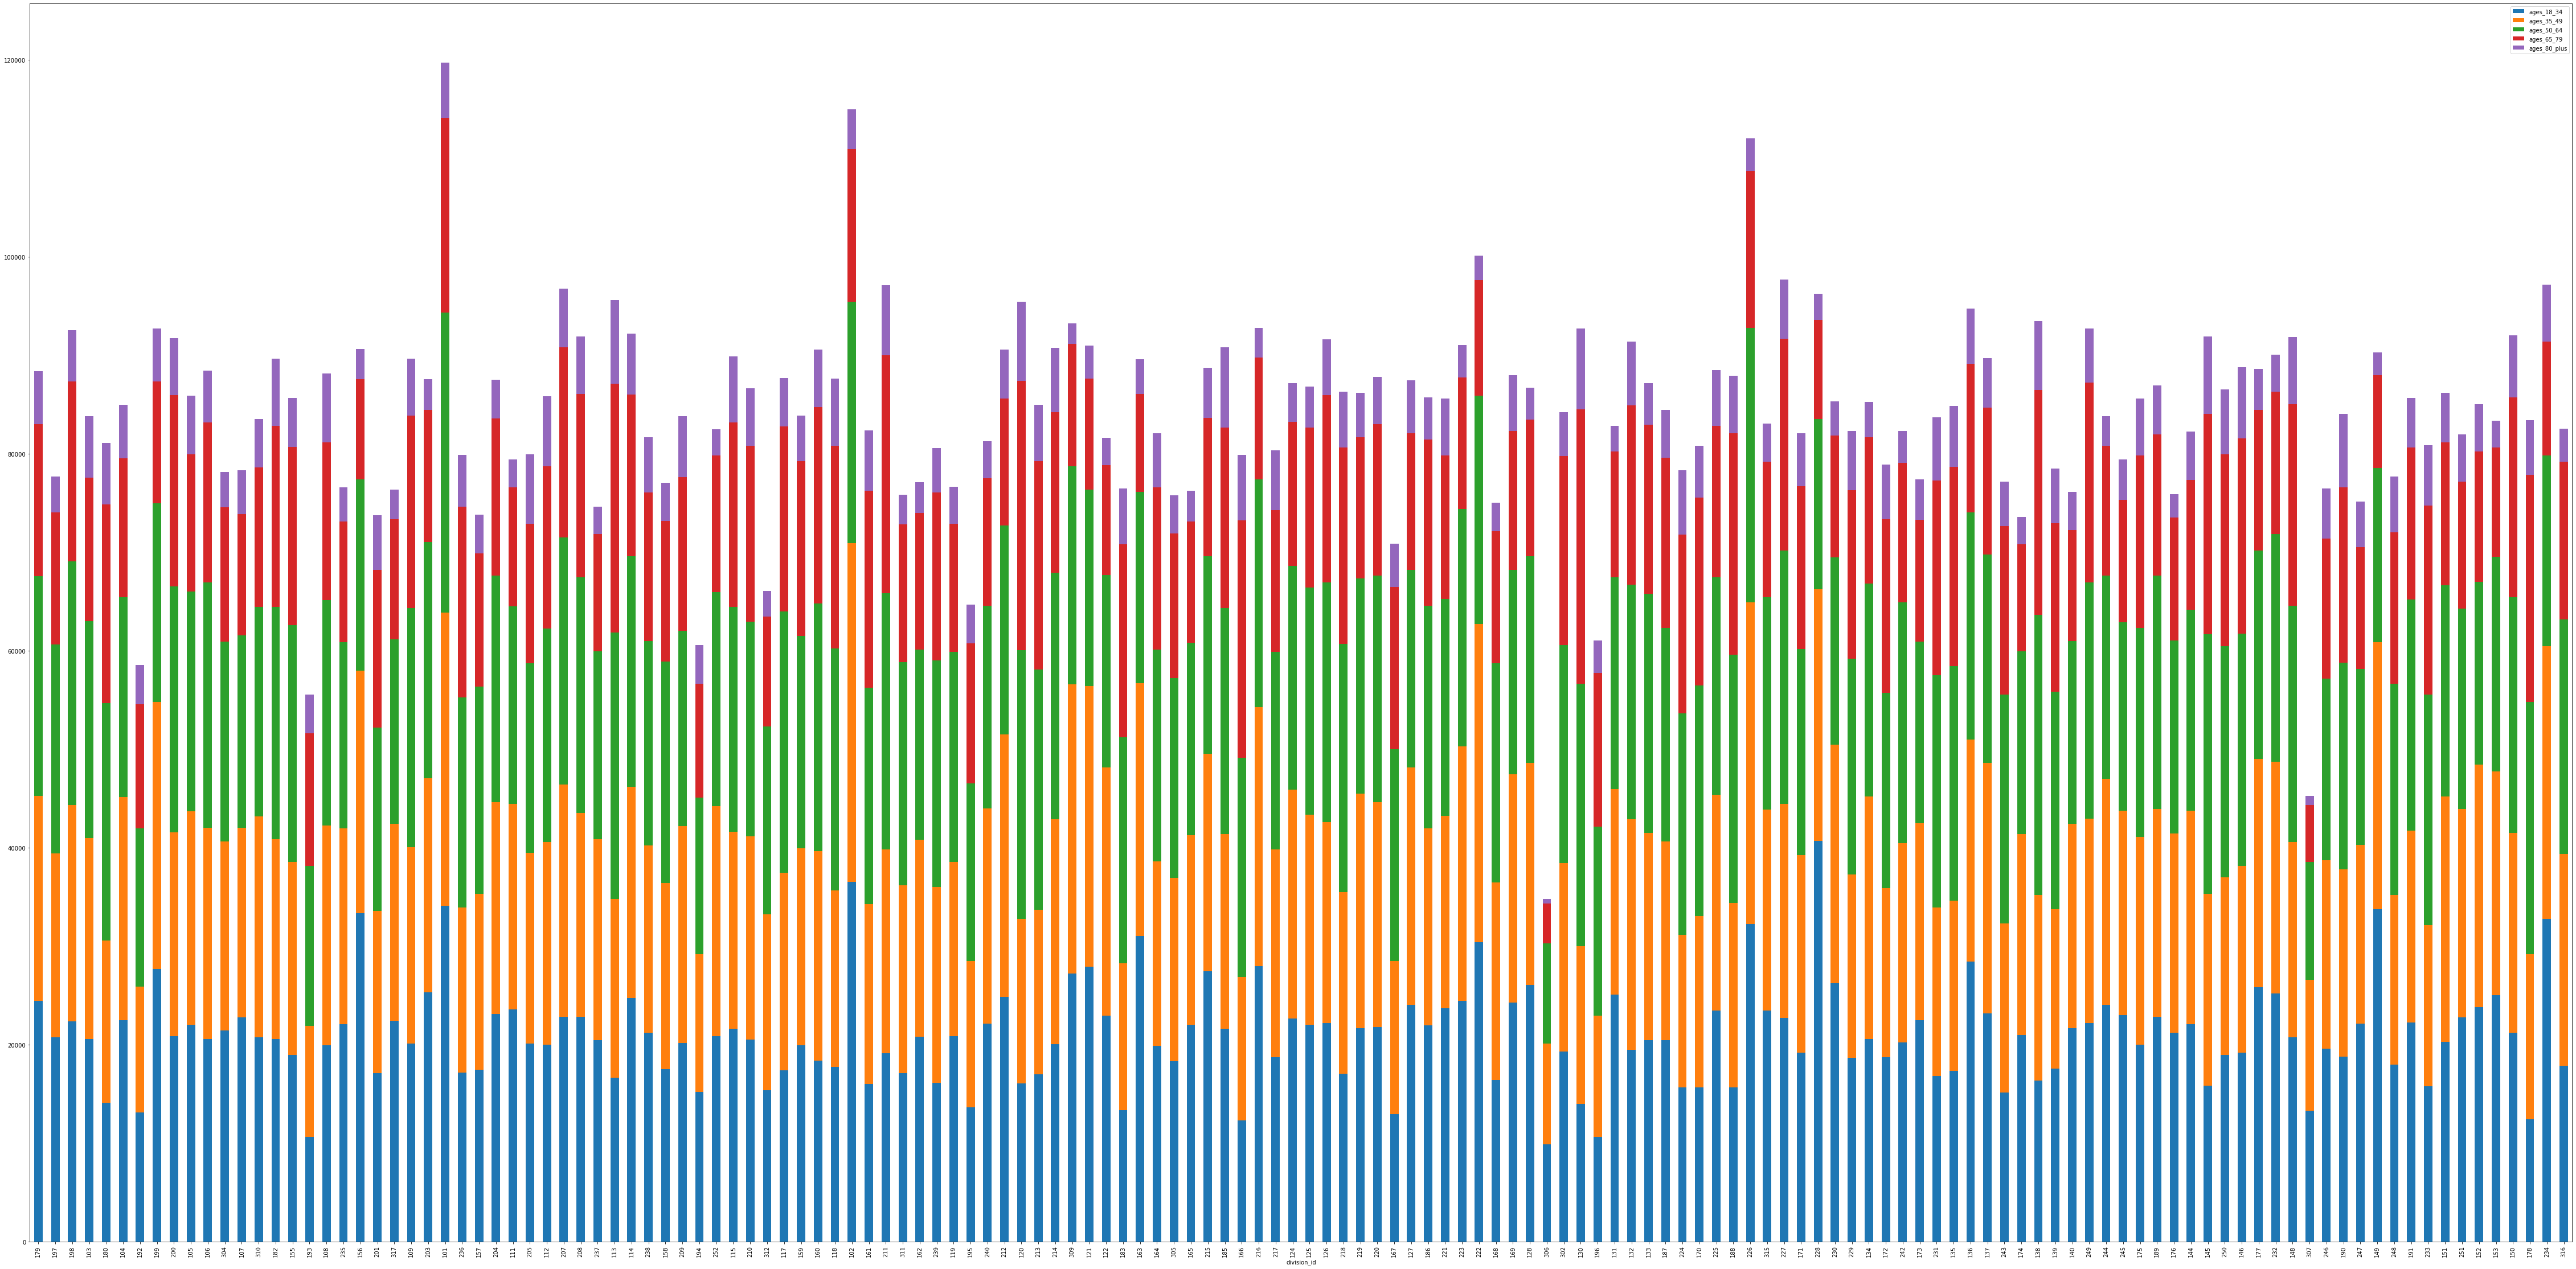

In [31]:
# stacked barchart to compare participants from each age group for each electoral division
combined_df.plot.bar(rot=90, stacked=True, figsize=(80,40))

# Exporting DataFrame to CSV

In [32]:
combined_df.to_csv("07-output_marriage_postal_participants_by_age/marriage_postal_participants_by_age.csv")